# **1. Importing Libraries**

In [176]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor

# **2. Loading the Dataset**

In [177]:
fpath = '/kaggle/input/insurance/insurance.csv'
insurance = pd.read_csv(fpath)
insurance.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# **3. Understanding and Pre-Processing the Data**

In [178]:
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Get rid of outliers

In [179]:
upper_limit = insurance.charges.mean() + 3*insurance.charges.std()
upper_limit

49600.45597522326

In [180]:
lower_limit = insurance.charges.mean() - 3*insurance.charges.std()
lower_limit

-23059.611444940747

In [181]:
insurance[(insurance.charges > upper_limit) | (insurance.charges < lower_limit)]

,age,sex,bmi,children,smoker,region,charges
34,28,male,36.400,1,yes,southwest,51194.55914
543,54,female,47.410,0,yes,southeast,63770.42801
577,31,female,38.095,1,yes,northeast,58571.07448
819,33,female,35.530,0,yes,northwest,55135.40209
1146,60,male,32.800,0,yes,southwest,52590.82939
1230,52,male,34.485,3,yes,northwest,60021.39897
1300,45,male,30.360,0,yes,southeast,62592.87309


In [182]:
insurance = insurance[insurance.charges < upper_limit]

In [183]:
insurance.charges.max()


49577.6624

In [184]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1331 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1331 non-null   int64  
 1   sex       1331 non-null   object 
 2   bmi       1331 non-null   float64
 3   children  1331 non-null   int64  
 4   smoker    1331 non-null   object 
 5   region    1331 non-null   object 
 6   charges   1331 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.2+ KB


Dropping duplicated values

In [185]:
insurance.duplicated().sum()

1

In [186]:
insurance.drop_duplicates(inplace=True)

In [187]:
label_encoder = LabelEncoder()
insurance['sex'] = label_encoder.fit_transform(insurance['sex'])
insurance['smoker'] = label_encoder.fit_transform(insurance['smoker'])
insurance['region'] = label_encoder.fit_transform(insurance['region'])

In [188]:
insurance.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


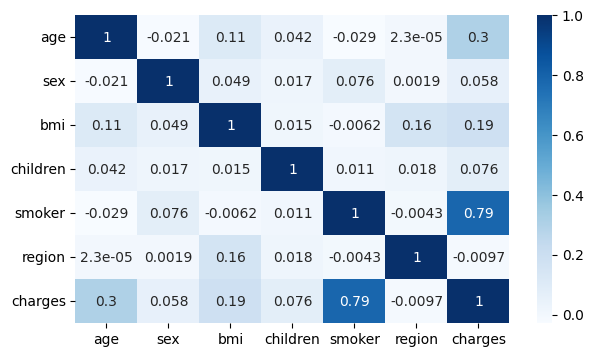

In [189]:
plt.figure(figsize=(7,4)) 
sns.heatmap(insurance.corr(),annot=True,cmap='Blues') #draws  heatmap with input as the correlation matrix calculted by(iris.corr())
plt.show()

# **4. Splitting the Data**

In [190]:
train, test = train_test_split(insurance, test_size = 0.2)# in this our main data is split into train and test
# the attribute test_size=0.3 splits the data into 70% and 30% ratio. train=70% and test=30%
print(train.shape)
print(test.shape)

(1064, 7)
(266, 7)


In [191]:
train_X = train[['age','sex','bmi','children','smoker','region']]# taking the training data features
train_y=train.charges# output of our training data
test_X= test[['age','sex','bmi','children','smoker','region']] # taking test data features
test_y =test.charges

In [192]:
train_X.head(5)

,age,sex,bmi,children,smoker,region
67,40,1,26.315,1,0,1
638,39,1,26.410,0,1,0
832,28,0,23.845,2,0,1
668,62,1,32.015,0,1,0
541,20,0,31.790,2,0,2


# **5. Training the Models**

**1. Linear Regression Model**

In [209]:
lr_model = LinearRegression()
lr_model.fit(train_X, train_y)

LinearRegression()

In [210]:
y_pred_lr = lr_model.predict(test_X)

In [211]:
mse_lr = mean_squared_error(test_y, y_pred_lr)
r2_lr = r2_score(test_y, y_pred_lr)

In [212]:
print(f'Mean Squared Error for Linear Regression: {mse_lr}')
print(f'R^2 Score for Linear Regression: {r2_lr}')

Mean Squared Error for Linear Regression: 34449393.944885224
R^2 Score for Linear Regression: 0.7512646548852024


**2. Random Forrest Model**

In [213]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(train_X, train_y)

RandomForestRegressor(random_state=42)

In [214]:
y_pred_rf = rf_model.predict(test_X)

In [215]:
mse_rf = mean_squared_error(test_y, y_pred_rf)
r2_rf = r2_score(test_y, y_pred_rf)

In [216]:
print(f'Mean Squared Error for Linear Regression: {mse_rf}')
print(f'R^2 Score for Linear Regression: {r2_rf}')

Mean Squared Error for Linear Regression: 19008277.157574136
R^2 Score for Linear Regression: 0.8627543234464099


**3. Polynomial Regression Model**

In [217]:
degree = 5  # Change the degree as needed
poly_features = PolynomialFeatures(degree=degree)
X_poly_train = poly_features.fit_transform(train_X)
X_poly_test = poly_features.transform(test_X)

# Create a Polynomial Regression model
poly_model = LinearRegression()
poly_model.fit(train_X, train_y)

LinearRegression()

In [218]:
y_pred_poly = poly_model.predict(test_X)

In [219]:
mse_poly = mean_squared_error(test_y, y_pred_poly)
r2_poly = r2_score(test_y, y_pred_poly)

In [220]:
print(f'Mean Squared Error for Linear Regression: {mse_poly}')
print(f'R^2 Score for Linear Regression: {r2_poly}')

Mean Squared Error for Linear Regression: 34449393.944885224
R^2 Score for Linear Regression: 0.7512646548852024


**4. Decision Tree Model**

In [221]:
tree_model = DecisionTreeRegressor(max_depth=4, random_state=42)
tree_model.fit(train_X, train_y)

DecisionTreeRegressor(max_depth=4, random_state=42)

In [222]:
y_pred_tree = tree_model.predict(test_X)

In [223]:
mse_tree = mean_squared_error(test_y, y_pred_tree)
r2_tree = r2_score(test_y, y_pred_tree)

In [224]:
print(f'Mean Squared Error for Linear Regression: {mse_tree}')
print(f'R^2 Score for Linear Regression: {r2_tree}')

Mean Squared Error for Linear Regression: 18767477.202195182
R^2 Score for Linear Regression: 0.8644929740624595


# **6.Conclusions**
* We can observe that, for this problem Decision Tree and Random Forest prove to be more efficient Regression models, compared to Linear and Polynomial Regression.
* I thought Polynomial Regression should have worked well, but the R2 value, plateaued after a certain degree.